In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from mmq import metodo_minimos_quadrados

In [3]:
df_tabela_ligantes = pd.read_excel(
    os.path.join("data", "df_tabela_ligantes.xlsx")
)

df_tabela_ligantes

,rotulo,hora_inicio,hora_fim,numero_medio_ligantes
0,1,00:00:00,00:15:00,601
1,2,00:15:00,00:30:00,190
2,3,00:30:00,00:45:00,180
3,4,00:45:00,01:00:00,177
4,5,01:00:00,01:15:00,162
...,...,...,...,...
91,92,22:45:00,23:00:00,920
92,93,23:00:00,23:15:00,897
93,94,23:15:00,23:30:00,571
94,95,23:30:00,23:45:00,560


In [7]:
df_duracoes = pd.read_excel(
    os.path.join("data", "df_duracoes.xlsx")
)
df_duracoes

,duracao_conexao,numero_ligantes,percentagem_relativa,percentagem_acumulada
0,0,0,0.000,0.000
1,5,870,0.087,0.087
2,10,2210,0.221,0.308
3,15,2940,0.294,0.602
4,20,1710,0.171,0.773
5,25,1360,0.136,0.909
6,30,590,0.059,0.968
7,35,250,0.025,0.993
8,40,70,0.007,1.000


<Axes: xlabel='duracao_conexao'>

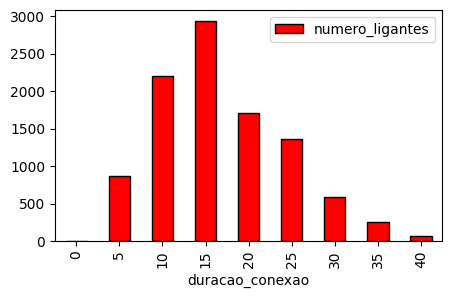

In [13]:
df_duracoes.plot(x="duracao_conexao",
                 y="numero_ligantes",
                 kind="bar",
                 figsize=(5,3),
                 color="red",
                 edgecolor="black")

,duracao_conexao,numero_ligantes,percentagem_relativa,percentagem_acumulada
0,0,0,0.000,0.000
1,5,870,0.087,0.087
2,10,2210,0.221,0.308
3,15,2940,0.294,0.602
4,20,1710,0.171,0.773
5,25,1360,0.136,0.909
6,30,590,0.059,0.968
7,35,250,0.025,0.993
8,40,70,0.007,1.000


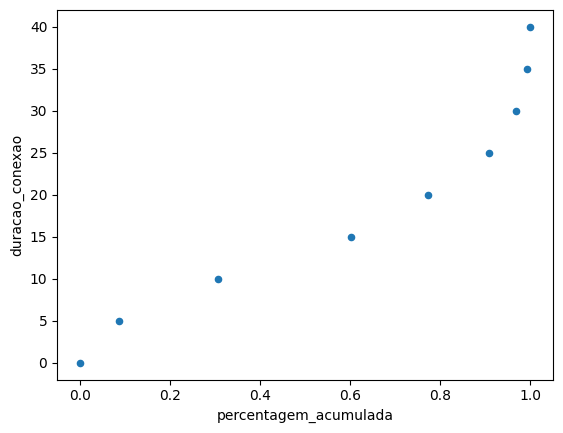

In [14]:
df_duracoes.plot(x="percentagem_acumulada",
                 y="duracao_conexao",
                 kind="scatter",
)
df_duracoes

In [15]:
coefs = metodo_minimos_quadrados.mmq(
    df_duracoes["percentagem_acumulada"],
    df_duracoes["duracao_conexao"],
    5
)
coefs

array([ 7.25285080e+02, -1.67791097e+03,  1.41326154e+03, -5.23808659e+02,
        1.01010563e+02, -2.06253859e-01])

In [17]:
x = np.linspace(0,1,1000) #gerando 1000 numeros igualmente espaçados entre 0 e 1.000
y = np.polyval(coefs, x) #Aplica um polinomio em cima desses dados

print(x[::100].round(1))
print(y[::100].round(1))

[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9]
[-0.2  5.9  7.9  9.3 11.3 13.8 16.  17.6 19.4 24.2]


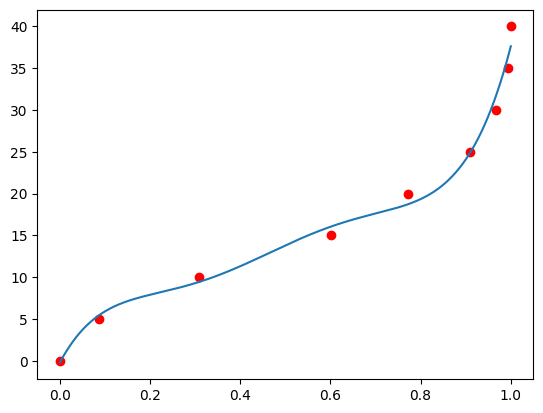

In [20]:
percentagens_acumuladas = df_duracoes["percentagem_acumulada"]
duracoes = df_duracoes["duracao_conexao"]

plt.scatter(percentagens_acumuladas, duracoes,
            color="red",
            label="Dados Originais")

plt.plot(x, y, label="Polinomio")
plt.show()

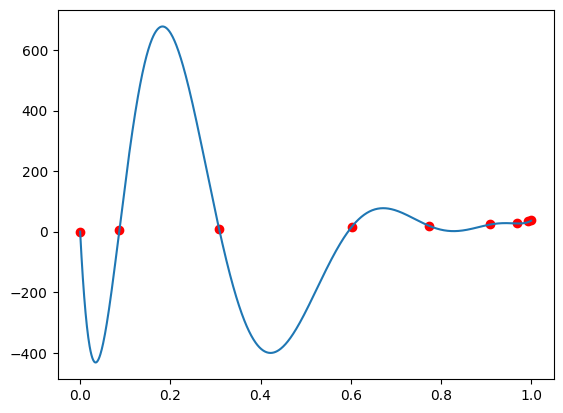

In [33]:
#Simulando mudana do coefs para grau 8 - fica claro que dá overfitting nos dados de treino/base

coefs = metodo_minimos_quadrados.mmq(
    df_duracoes["percentagem_acumulada"],
    df_duracoes["duracao_conexao"],
    8
)

x = np.linspace(0,1,1000) #gerando 1000 numeros igualmente espaçados entre 0 e 1.000
y = np.polyval(coefs, x) #Aplica um polinomio em cima desses dados

plt.scatter(percentagens_acumuladas, duracoes,
            color="red",
            label="Dados Originais")

plt.plot(x, y, label="Polinomio")
plt.show()

In [34]:
coefs = metodo_minimos_quadrados.mmq(
    df_duracoes["percentagem_acumulada"],
    df_duracoes["duracao_conexao"],
    5
)
coefs

array([ 7.25285080e+02, -1.67791097e+03,  1.41326154e+03, -5.23808659e+02,
        1.01010563e+02, -2.06253859e-01])

In [35]:
np.polyval(coefs, 0)

np.float64(-0.20625385923040085)

In [36]:
np.polyval(coefs, [0, 0.1, 0.2, 0.3])

array([-0.20625386,  5.90943916,  7.89703842,  9.28356129])

In [37]:
#Criando mil aleatorios para simular o tempo de chegada das ligações
tempos_aleatorios = []

for _ in range(10_000):
    alpha = np.random.random()
    tempo = np.polyval(coefs, alpha)
    tempos_aleatorios.append(tempo)

np.mean(tempos_aleatorios)

np.float64(14.369746674538145)

In [38]:
df_tabela_ligantes.loc[0]

rotulo                          1
hora_inicio              00:00:00
hora_fim                 00:15:00
numero_medio_ligantes         601
Name: 0, dtype: object

In [39]:
#exibindo numero medio ligantes da primeira linha (linha 0)
qtd_ligacoes = \
df_tabela_ligantes.loc[0, "numero_medio_ligantes"]
qtd_ligacoes

np.int64(601)

In [40]:
np.random.seed(0)
momentos_ligacoes = np.random.randint(0, 900, size=qtd_ligacoes)
momentos_ligacoes[:10]

array([684, 559, 629, 192, 835, 763, 707, 359,   9, 723], dtype=int32)

In [44]:
df_duracoes.loc[0,"duracao_conexao"]

np.int64(0)

,duracao_conexao,numero_ligantes,percentagem_relativa,percentagem_acumulada
0,0,0,0.000,0.000
1,5,870,0.087,0.087
2,10,2210,0.221,0.308
3,15,2940,0.294,0.602
4,20,1710,0.171,0.773
5,25,1360,0.136,0.909
6,30,590,0.059,0.968
7,35,250,0.025,0.993
8,40,70,0.007,1.000


In [56]:
momentos_ligacoes[:10]

array([ 0,  3,  4,  4,  7,  9, 11, 11, 13, 13], dtype=int32)

In [57]:
momentos_ligacoes.sort()
momentos_ligacoes[:10]

array([ 0,  3,  4,  4,  7,  9, 11, 11, 13, 13], dtype=int32)

In [ ]:
#criando uma lista de dicionarios que vai conter os atendentes (inicio e fim de atendimento)
atendentes: list[dict] = []

In [59]:
np.set_printoptions(legacy="1.13")

In [61]:
momento_ligacao = momentos_ligacoes[0]
momento_ligacao

0

In [62]:
#vamos sortear um aleatorio para simular o tempo que vai levar a primeira ligação
np.random.seed(0)
aleatorio = np.random.rand()
tempo_duracao = abs(np.polyval(coefs, aleatorio))
print(tempo_duracao)

14.9651548719


In [63]:
#validando se a lista de atendentes está vazia e se estiver e tem ligação, cria uma atendente
if atendentes == []:
    atendente = {
        "inicio": momento_ligacao,
        "fim": momento_ligacao + tempo_duracao
    } 
    atendentes.append(atendente)

atendentes

[{'inicio': 0, 'fim': 14.965154871866302}]

In [64]:
momento_ligacao = momentos_ligacoes[1]
momento_ligacao

3

In [65]:
espera_maxima = 10
tempo_descanso = 0

In [66]:
np.random.seed(1)
aleatorio = np.random.random()
tempo_duracao = abs(np.polyval(coefs, aleatorio))
tempo_duracao

11.718611910921702

In [67]:
#alocando a ligação no atendente se ele estiver disponivel
for atendente in atendentes:
    fim = atendente["fim"] + tempo_descanso

    if momento_ligacao + espera_maxima < fim:
        ocupado = True
    else:
        ocupado = False

    if not ocupado:
        
        if momento_ligacao + espera_maxima > fim:
            atendente["inicio"] = momento_ligacao + espera_maxima
        else:
            atendente["inicio"] = fim

        atendente["fim"] = atendente["inicio"] + tempo_duracao
        break

#Esse else abaixo entra no caso de quando não bateu no break em nenhum momento (nesse caso, significa que todos atendente
#estao ocupados, entao precisa criar um novo;
else: 
    atendente = {
        "inicio": momento_ligacao,
        "fim": momento_ligacao + tempo_duracao
    }
    atendentes.append(atendente)
atendentes

[{'inicio': 0, 'fim': 14.965154871866302},
 {'inicio': 3, 'fim': 14.718611910921702}]

In [68]:
momento_ligacao = momentos_ligacoes[2]
momento_ligacao

4

In [71]:
np.random.seed(5)
espera_maxima = 10
tempo_descanso = 0
atendentes = []

for momento_ligacao in momentos_ligacoes:
    # print(momento_ligacao)
    aleatorio = np.random.rand()
    tempo_duracao = abs(np.polyval(coefs, aleatorio))

    #alocando a ligação no atendente se ele estiver disponivel
    for atendente in atendentes:
        fim = atendente["fim"] + tempo_descanso

        if momento_ligacao + espera_maxima < fim:
            ocupado = True
        else:
            ocupado = False

        if not ocupado:
            
            if momento_ligacao + espera_maxima > fim:
                atendente["inicio"] = momento_ligacao + espera_maxima
            else:
                atendente["inicio"] = fim

            atendente["fim"] = atendente["inicio"] + tempo_duracao
            break

    #Esse else abaixo entra no caso de quando não bateu no break em nenhum momento (nesse caso, significa que todos atendente
    #estao ocupados, entao precisa criar um novo;
    else: 
        atendente = {
            "inicio": momento_ligacao,
            "fim": momento_ligacao + tempo_duracao
        }
        atendentes.append(atendente)

atendentes

[{'inicio': 904, 'fim': 914.40375649914586},
 {'inicio': 906, 'fim': 917.86945228521722},
 {'inicio': 909, 'fim': 917.37356632891419},
 {'inicio': 900, 'fim': 912.04701461339766},
 {'inicio': 906, 'fim': 913.54143974666329},
 {'inicio': 906, 'fim': 909.2110175449709},
 {'inicio': 907, 'fim': 923.65667308860293},
 {'inicio': 898, 'fim': 910.8046881536053},
 {'inicio': 892, 'fim': 918.91345869819895},
 {'inicio': 892, 'fim': 899.69624954342305},
 {'inicio': 895, 'fim': 921.10612201694778},
 {'inicio': 894, 'fim': 924.6907424196321},
 {'inicio': 894, 'fim': 912.97138605835903},
 {'inicio': 895, 'fim': 911.50408246353663},
 {'inicio': 896, 'fim': 906.24103253314115},
 {'inicio': 896, 'fim': 913.60372670627521},
 {'inicio': 899, 'fim': 917.10414351614531},
 {'inicio': 899, 'fim': 928.75678692654105},
 {'inicio': 899, 'fim': 903.08006092176959},
 {'inicio': 899, 'fim': 906.40232584628484}]

In [73]:
np.random.seed(5)
tempo_descanso = 0
espera_maxima = 10
atendentes = []
for momento_ligacao in momentos_ligacoes:
    aleatorio = np.random.random()
    tempo_duracao = abs(np.polyval(coefs, aleatorio))

    for atendente in atendentes:
        fim = atendente["fim"] + tempo_descanso

        if momento_ligacao + espera_maxima < fim:
            ocupado = True
        else:
            ocupado = False

        if not ocupado:

            if momento_ligacao + espera_maxima > fim:
                atendente["inicio"] = momento_ligacao + espera_maxima
            else:
                atendente["inicio"] = fim
            
            atendente["fim"] = atendente["inicio"] + tempo_duracao
            break
    else:

        atendente = {
            "inicio": momento_ligacao,
            "fim": momento_ligacao + tempo_duracao
        }
        atendentes.append(atendente)

atendentes

[{'inicio': 904, 'fim': 914.40375649914586},
 {'inicio': 906, 'fim': 917.86945228521722},
 {'inicio': 909, 'fim': 917.37356632891419},
 {'inicio': 900, 'fim': 912.04701461339766},
 {'inicio': 906, 'fim': 913.54143974666329},
 {'inicio': 906, 'fim': 909.2110175449709},
 {'inicio': 907, 'fim': 923.65667308860293},
 {'inicio': 898, 'fim': 910.8046881536053},
 {'inicio': 892, 'fim': 918.91345869819895},
 {'inicio': 892, 'fim': 899.69624954342305},
 {'inicio': 895, 'fim': 921.10612201694778},
 {'inicio': 894, 'fim': 924.6907424196321},
 {'inicio': 894, 'fim': 912.97138605835903},
 {'inicio': 895, 'fim': 911.50408246353663},
 {'inicio': 896, 'fim': 906.24103253314115},
 {'inicio': 896, 'fim': 913.60372670627521},
 {'inicio': 899, 'fim': 917.10414351614531},
 {'inicio': 899, 'fim': 928.75678692654105},
 {'inicio': 899, 'fim': 903.08006092176959},
 {'inicio': 899, 'fim': 906.40232584628484}]

In [74]:
len(atendentes)

20

In [ ]:
#Para evitar que o primeiro atendente seja sempre o primeiro a ser alocado, é necessário embaralhar a ordem dos atendentes 
# para alocar as ligações depois
np.random.permutation([1,2,3,4,5,6,7,8])

array([2, 1, 5, 4, 8, 6, 3, 7])

In [77]:
np.random.seed(5)
tempo_descanso = 0
espera_maxima = 10
atendentes = []

for momento_ligacao in momentos_ligacoes:
    aleatorio = np.random.random()
    tempo_duracao = abs(np.polyval(coefs, aleatorio))

    atendentes = list(np.random.permutation(atendentes))

    for atendente in atendentes:
        fim = atendente["fim"] + tempo_descanso

        if momento_ligacao + espera_maxima < fim:
            ocupado = True
        else:
            ocupado = False

        if not ocupado:

            if momento_ligacao + espera_maxima > fim:
                atendente["inicio"] = momento_ligacao + espera_maxima
            else:
                atendente["inicio"] = fim
            
            atendente["fim"] = atendente["inicio"] + tempo_duracao
            break
    else:

        atendente = {
            "inicio": momento_ligacao,
            "fim": momento_ligacao + tempo_duracao
        }
        atendentes.append(atendente)

atendentes

[{'inicio': 899, 'fim': 909.29559843894401},
 {'inicio': 900, 'fim': 910.8933443095973},
 {'inicio': 899, 'fim': 932.21236758365058},
 {'inicio': 909, 'fim': 917.53861755832725},
 {'inicio': 904, 'fim': 920.23396462394362},
 {'inicio': 899, 'fim': 908.85265704367271},
 {'inicio': 867, 'fim': 894.99620690112238},
 {'inicio': 901, 'fim': 917.6665794080742},
 {'inicio': 907, 'fim': 915.17518229744098},
 {'inicio': 906, 'fim': 913.65133331325376},
 {'inicio': 896, 'fim': 906.82228408336164},
 {'inicio': 892, 'fim': 907.66966276223832},
 {'inicio': 882, 'fim': 901.13837906628623},
 {'inicio': 883, 'fim': 902.83508527519712},
 {'inicio': 814, 'fim': 843.61932084942623},
 {'inicio': 899, 'fim': 907.73089614730179},
 {'inicio': 896, 'fim': 912.80887287288704},
 {'inicio': 906, 'fim': 930.7765085877561},
 {'inicio': 906, 'fim': 914.04967842284293}]

In [78]:
len(atendentes)

19

In [81]:
df_tabela_ligantes

,rotulo,hora_inicio,hora_fim,numero_medio_ligantes
0,1,00:00:00,00:15:00,601
1,2,00:15:00,00:30:00,190
2,3,00:30:00,00:45:00,180
3,4,00:45:00,01:00:00,177
4,5,01:00:00,01:15:00,162
...,...,...,...,...
91,92,22:45:00,23:00:00,920
92,93,23:00:00,23:15:00,897
93,94,23:15:00,23:30:00,571
94,95,23:30:00,23:45:00,560


In [83]:
np.random.seed(5)
tempo_descanso = 0
espera_maxima = 10
coluna_nan = []

for i, linha in df_tabela_ligantes.iterrows():
    qtd_ligacoes = linha["numero_medio_ligantes"]

    momentos_ligacoes = np.random.randint(0, 900, size=qtd_ligacoes)
    momentos_ligacoes.sort()

    atendentes = []
    for momento_ligacao in momentos_ligacoes:
        aleatorio = np.random.random()
        tempo_duracao = abs(np.polyval(coefs, aleatorio))

        atendentes = list(np.random.permutation(atendentes))

        for atendente in atendentes:
            fim = atendente["fim"] + tempo_descanso

            if momento_ligacao + espera_maxima < fim:
                ocupado = True
            else:
                ocupado = False

            if not ocupado:

                if momento_ligacao + espera_maxima > fim:
                    atendente["inicio"] = momento_ligacao + espera_maxima
                else:
                    atendente["inicio"] = fim
                
                atendente["fim"] = atendente["inicio"] + tempo_duracao
                break
        else:

            atendente = {
                "inicio": momento_ligacao,
                "fim": momento_ligacao + tempo_duracao
            }
            atendentes.append(atendente)
    
    nan = len(atendentes)
    coluna_nan.append(nan)

coluna_nan

[20,
 9,
 8,
 9,
 8,
 5,
 6,
 7,
 5,
 5,
 4,
 5,
 4,
 4,
 4,
 4,
 4,
 5,
 4,
 4,
 4,
 4,
 3,
 4,
 6,
 6,
 8,
 7,
 20,
 21,
 23,
 23,
 41,
 41,
 41,
 45,
 66,
 59,
 60,
 67,
 70,
 75,
 71,
 75,
 66,
 64,
 62,
 68,
 57,
 57,
 56,
 60,
 64,
 67,
 63,
 70,
 69,
 67,
 64,
 66,
 71,
 66,
 70,
 67,
 68,
 66,
 68,
 71,
 68,
 69,
 73,
 62,
 55,
 51,
 52,
 48,
 45,
 44,
 39,
 38,
 41,
 36,
 36,
 40,
 36,
 34,
 30,
 31,
 31,
 26,
 26,
 26,
 23,
 18,
 18,
 18]

In [84]:
df_tabela_ligantes["nan"] = coluna_nan
df_tabela_ligantes

,rotulo,hora_inicio,hora_fim,numero_medio_ligantes,nan
0,1,00:00:00,00:15:00,601,20
1,2,00:15:00,00:30:00,190,9
2,3,00:30:00,00:45:00,180,8
3,4,00:45:00,01:00:00,177,9
4,5,01:00:00,01:15:00,162,8
...,...,...,...,...,...
91,92,22:45:00,23:00:00,920,26
92,93,23:00:00,23:15:00,897,23
93,94,23:15:00,23:30:00,571,18
94,95,23:30:00,23:45:00,560,18
